# Imports

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import numpy as np

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay
from tensorflow.keras.optimizers import SGD

# Dados

In [ ]:
df = pd.read_csv("/home/pedro/Documents/BIA/p3/PAD/trabalho-final/deteccao-de-fraude/data/creditcard_treated.csv", index_col=0)

In [ ]:
class_label = df.Class
df = df.drop(columns=['Class'])

# K-Means

- K-means

In [ ]:
# Aplicar KMeans com 3 clusters (que os nossos colegas descobriram)
kmeans = KMeans(n_clusters=3, random_state=434)
kmeans.fit(df)

KMeans(n_clusters=3, random_state=434)

- Normalizar distâncias

In [ ]:
# Calcular a distância de cada ponto ao centro do cluster correspondente
centers = kmeans.cluster_centers_
distances = np.linalg.norm(df - centers[kmeans.labels_], axis=1)
# Normalizar as distâncias
distances_scaled = StandardScaler().fit_transform(distances.reshape(-1, 1))

- Organizar cluster

In [ ]:
# Adicionar as labels do cluster à tabela
df['Cluster'] = kmeans.labels_

# Adicionar a distância à tabela
df['Distance_to_Center'] = distances_scaled

# Adicionar as classes novamente
df['Class'] = class_label
df = df.drop(columns=['Time','Amount'])

display(df)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Cluster,Distance_to_Center,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,1,2.586807,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,1,2.586807,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1,2.586682,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,1,2.586682,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,1,2.586558,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566501,-7.151786,5.337862,-10.524210,6.638176,-7.107253,-3.688276,-11.629728,4.641323,-6.040679,-13.178539,...,-0.223411,0.029599,0.393875,-0.049155,0.544700,1.306198,0.223600,1,-0.611082,1
566502,-4.705909,8.250299,-14.559164,9.787990,-4.117161,-3.169121,-10.169571,4.500750,-5.177936,-10.851427,...,0.194092,0.480124,-1.079562,-0.444215,0.557467,1.234855,0.627900,1,0.809383,1
566503,0.407366,1.352354,-4.892782,3.554728,-1.282114,-1.271505,-0.977517,0.462476,-1.442286,-3.619048,...,0.703300,0.814076,0.814930,-0.300969,0.168339,0.236775,0.037244,0,-0.498273,1
566504,0.580032,2.773047,-5.790024,5.606953,0.398480,-0.621865,-2.954884,0.837074,-1.822486,-4.602626,...,-0.810361,-0.067584,-0.632356,0.414552,0.073243,0.736440,0.358067,2,2.232127,1


# EDA

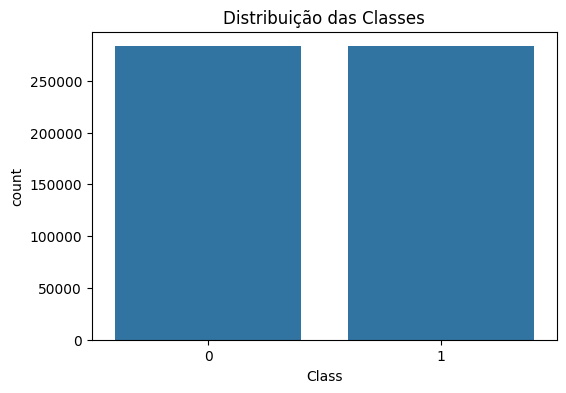

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribuição das classes
plt.figure(figsize=(6, 4))
sns.countplot(x='Class', data=df)
plt.title('Distribuição das Classes')
plt.show()

Por conta do SMOTE temos o meus numero de fraude e transações normais

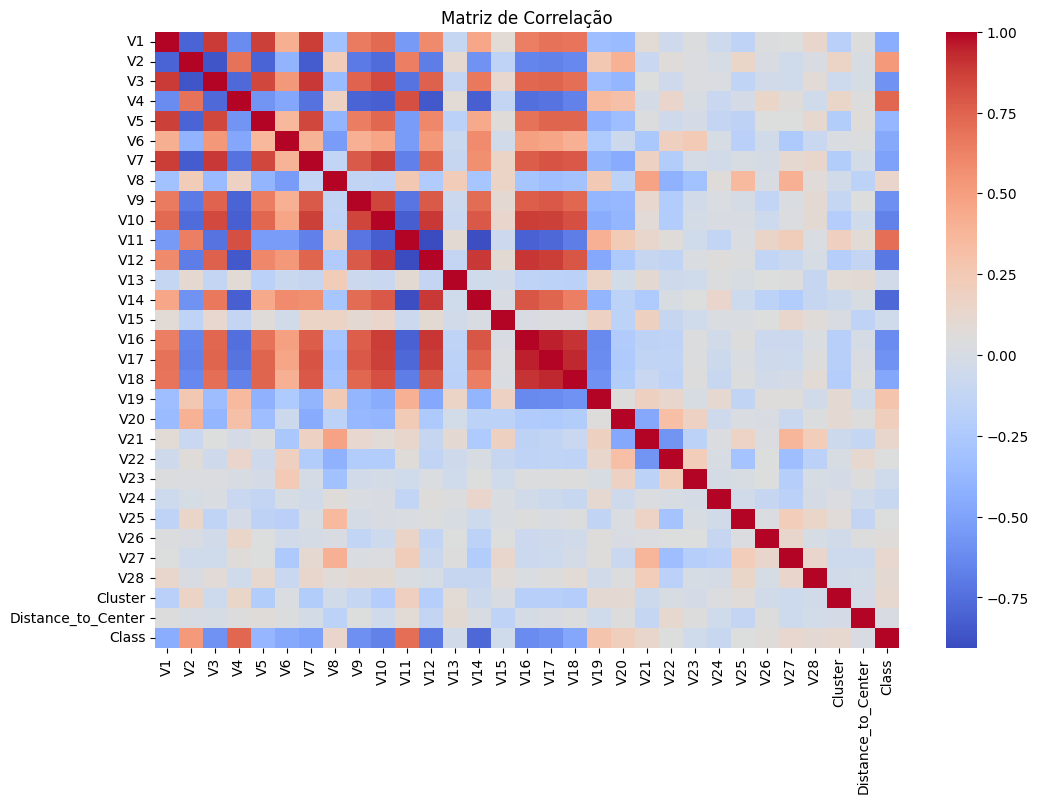

In [ ]:
# Visualizar correlação
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), cmap='coolwarm', annot=False)
plt.title('Matriz de Correlação')
plt.show()

Podemos ver que os dados possuem uma boa matriz de correlação

---
# Modelo

In [ ]:
X = df.drop(columns=['Class'])
y = df['Class']

- Split treino - teste

In [ ]:
# Dividindo os dados em 40% treino e 60% temporários (para teste e validação)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.6, random_state=42, stratify=y)

# Dividindo os dados temporários em 50% teste e 50% validação (resultando em 30% cada do total original)
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)


- Normalizar

In [ ]:
# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_val = scaler.transform(X_val)
# X_test = scaler.transform(X_test)

- Criar modelo

In [ ]:
# Definir a rede neural profunda
model = Sequential([
    Dense(32, input_dim=X_train.shape[1], activation='relu'),
    Dropout(0.2),
    Dense(16, activation='relu'),
    Dropout(0.2),
    Dense(8, activation='relu'),
    Dense(1, activation='sigmoid')  # Supondo que seja uma classificação binária
])

/home/pedro/Documents/BIA/p3/PAD/trabalho-final/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2024-07-09 14:26:49.505660: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-07-09 14:26:49.507188: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2251] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to 

- Compilar

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

- Treinar

In [ ]:
# Treinando o modelo
history = model.fit(X_train, y_train, epochs=5, batch_size=64, validation_data=(X_val, y_val))

Epoch 1/5


2024-07-09 14:26:49.751480: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 27192240 exceeds 10% of free system memory.


3540/3541 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9601 - loss: 0.1062

2024-07-09 14:26:58.044616: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 20394240 exceeds 10% of free system memory.


3541/3541 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.9601 - loss: 0.1062 - val_accuracy: 0.9941 - val_loss: 0.0192
Epoch 2/5
3541/3541 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.9920 - loss: 0.0251 - val_accuracy: 0.9972 - val_loss: 0.0104
Epoch 3/5
3541/3541 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.9955 - loss: 0.0159 - val_accuracy: 0.9980 - val_loss: 0.0072
Epoch 4/5
3541/3541 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.9968 - loss: 0.0118 - val_accuracy: 0.9982 - val_loss: 0.0064
Epoch 5/5
3541/3541 ━━━━━━━━━━━━━━━━━━━━ 21s 3ms/step - accuracy: 0.9972 - loss: 0.0096 - val_accuracy: 0.9984 - val_loss: 0.0056


- Avaliar

In [ ]:
# Avaliação adicional
y_pred = (model.predict(X_test) > 0.5).astype("int32")
print(classification_report(y_test, y_pred))
print(f'ROC-AUC: {roc_auc_score(y_test, y_pred)}')

  84/5311 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step 

2024-07-09 14:28:01.915157: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 20394240 exceeds 10% of free system memory.


5311/5311 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     84976
           1       1.00      1.00      1.00     84976

    accuracy                           1.00    169952
   macro avg       1.00      1.00      1.00    169952
weighted avg       1.00      1.00      1.00    169952

ROC-AUC: 0.9984113161363208


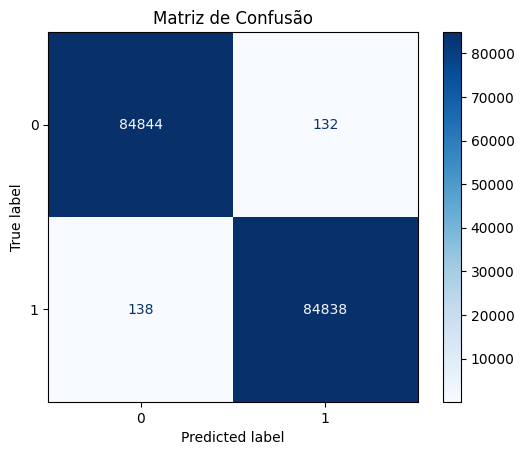

In [ ]:
# Gerar matriz de confusão
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title('Matriz de Confusão')
plt.show()

- Train and val loss

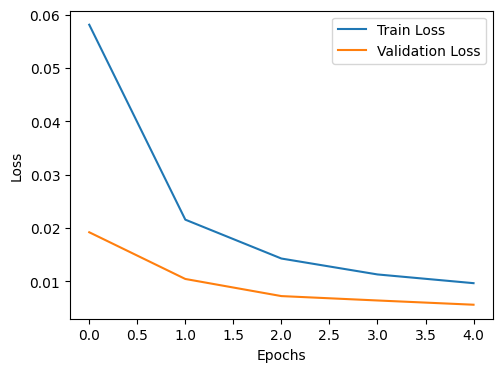

In [ ]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

- Acurácia e loss conforme os treinos

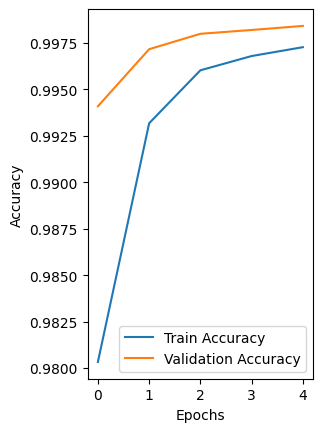

In [ ]:
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

# DICAS

- Kmeans:
  - Justificar escolha do algoritmo (porque kmeans e não outros métodos de clusterização)
  - Explicar como foi usado
  - Trazer vantagens teóricas e empíricas do uso do kmeans neste trabalho
  - Pesquisar sobre Score de silhouette, Davis-Boundin e Calinski-Harabaz. Estas são métricas que medem a qualidade dos clusters encontrados (kmeans normalmente é um lixo)
- Processamento:
  - As performances dos testes estão boas demais pra ser verdade kkkkkk. As chances são que o smote exagerou nos dados. O que vc pode fazer é gerar dados para classe Fraude com SMOTE ou ADASYN, mas manter os dados originais fora do conjunto de treino. O objetivo é treinar com dados sintéticos e testar com dados reais. Assim você vai ter uma noção legal da performance.

  - Explorar métodos de remoção de outlier (evelope elíptico, isolation forest)

- EDA (Exploratory Data Analysis):
  - Aplicar redução de dimensionalidade (PCA, T-sne, UMAP) para visualização das classes
  - A correlação é interessante mas não é tão útil aqui uma vez que não sabemos o significado de cada feature

- Modelo:
  - Se você faz um modelo pequeno, tem chance da performance ser pequena, se você faz um modelo muito grande tem chance de overfitar. Pra vc encontrar o tamanho ideal vc tem que experimentar diferentes tamanhos.
  DICAS:
    - Crie várias arquiteturas de tamanhos variados e teste com todas. Armazene os resultados em algum lugar.
    - Defina uma Seed para manter os experimentos reproduziveis.
    - Use a performace da "val" para escolher qual modelo é o melhor, despois faça só um teste com "X_test" para pegar as métricas do melhor modelo.

  - Justificar escolha de hiperparametros como batch_size, otimizador etc.

  